# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [85]:
import pandas as pd
import numpy as np
import sqlalchemy
import re

# Challenge 1

#### Read the `employees` dataset from Ironhack's database:
* db: `employees`
* table: `employees`

Save your data in a variable called `employees`.

In [3]:
driver = 'mysql+pymysql'
user = 'data-students'
password = 'iR0nH@cK-D4T4B4S3'
ip = '34.65.10.136'
database = 'employees'

conn_string = f'{driver}://{user}:{password}@{ip}/{database}'
conn = sqlalchemy.create_engine(conn_string)

In [6]:
employees = pd.read_sql_query('SELECT * FROM employees.employees;', conn)
employees.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [7]:
employees

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


In [5]:
employees.groupby("Department", as_index=True)[['Salary']].mean()

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [16]:
department_salary_mean = pd.pivot_table(employees,index=["Department"],values=["Salary"],aggfunc=np.mean)
department_salary_mean

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [17]:
department_title_salary_mean = pd.pivot_table(employees,index=["Department", "Title"],values=["Salary"],aggfunc=np.mean)
department_title_salary_mean

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [24]:
title_years_salary = pd.pivot_table(employees,index=["Title"], columns= ["Years"], values=["Salary"])
title_years_salary

Salary                              
Years          1     2     3     4     7     8
Title                                         
VP           NaN   NaN   NaN   NaN   NaN  70.0
analyst     35.0  30.0   NaN  35.0   NaN   NaN
associate    NaN  55.0  55.0   NaN  60.0   NaN

#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [32]:
employees_title_salary_mean = pd.pivot_table(employees,index=["Department", "Title"],values=["Salary", "Name"],aggfunc={"Salary": "mean","Name": "count"})
employees_title_salary_mean

Name  Salary
Department Title                  
HR         VP            1    70.0
           analyst       2    32.5
IT         VP            1    70.0
           analyst       2    32.5
           associate     1    60.0
Sales      associate     2    55.0

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [36]:
department_title_salary_analysis = pd.pivot_table(employees,index=["Department", "Title"],values=["Salary"],aggfunc={"Salary": [np.median,min,max,np.std]})
department_title_salary_analysis

Salary                       
                        max median   min       std
Department Title                                  
HR         VP          70.0   70.0  70.0       NaN
           analyst     35.0   32.5  30.0  3.535534
IT         VP          70.0   70.0  70.0       NaN
           analyst     35.0   32.5  30.0  3.535534
           associate   60.0   60.0  60.0       NaN
Sales      associate   55.0   55.0  55.0  0.000000

In [ ]:
"""
There is not that much deviation when it come to salary, because most of them have the same min, max and median.
The only job title with deviation is the analyst, because it varies from min, median, max (30, 32.5, 35),
hence the Standerd deviation is 3.535534
"""

#### Based on your comments, fill the missing values with an appropriate value.

In [38]:
department_title_salary_analysis_filled = pd.pivot_table(employees,index=["Department", "Title"],values=["Salary"],aggfunc={"Salary": [np.median,min,max,np.std]}, fill_value=0)
department_title_salary_analysis_filled

Salary                     
                        max median min       std
Department Title                                
HR         VP            70   70.0  70  0.000000
           analyst       35   32.5  30  3.535534
IT         VP            70   70.0  70  0.000000
           analyst       35   32.5  30  3.535534
           associate     60   60.0  60  0.000000
Sales      associate     55   55.0  55  0.000000

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [39]:
department_employees_salary = pd.pivot_table(employees,index=["Department"],values=["Salary", "Name"],aggfunc={"Salary": "sum","Name": "count"})
department_employees_salary

,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [40]:
employees_title_salary_year_mean = pd.pivot_table(employees,index=["Department", "Title"],values=["Salary", "Years"],aggfunc={"Salary": "mean","Years": "sum"})
employees_title_salary_year_mean

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [ ]:
# your code here

# Challenge 2

#### Read the `fitbit` dataset from Ironhack's database:
* db: `fitbit`
* table: `fitbit`

Save your data in a variable called `fitbit`.

In [41]:
driver = 'mysql+pymysql'
user = 'data-students'
password = 'iR0nH@cK-D4T4B4S3'
ip = '34.65.10.136'
database = 'fitbit'

conn_string = f'{driver}://{user}:{password}@{ip}/{database}'
conn = sqlalchemy.create_engine(conn_string)

In [42]:
fitbit = pd.read_sql_query('SELECT * FROM fitbit.fitbit;', conn)
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417\r
1,09-05-2015,3631,18925,14.11,4,611.0,316,61,60,2248,454,35,21,491\r
2,10-05-2015,3204,14228,10.57,1,602.0,226,14,77,1719,387,46,25,436\r
3,11-05-2015,2673,6756,5.02,8,749.0,190,23,4,9620,311,31,21,350\r
4,12-05-2015,2495,502,3.73,1,876.0,171,0,0,7360,407,65,44,491\r


#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [43]:
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
Date                      367 non-null object
Calorie burned            367 non-null int64
Steps                     367 non-null int64
Distance                  367 non-null object
Floors                    367 non-null int64
Minutes Sedentary         367 non-null object
Minutes Lightly Active    367 non-null int64
Minutes Fairly Active     367 non-null int64
Minutes Very Active       367 non-null int64
Activity Calories         367 non-null int64
MinutesOfSleep            367 non-null int64
MinutesOfBeingAwake       367 non-null int64
NumberOfAwakings          367 non-null int64
LengthOfRestInMinutes     367 non-null object
dtypes: int64(10), object(4)
memory usage: 40.2+ KB


In [45]:
fitbit.describe()

,Calorie burned,Steps,Floors,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,11.724796,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185
std,916.307036,5594.836225,10.337370,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622
min,179.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,5.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000
50%,2974.000000,10413.000000,11.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000
75%,3233.000000,13916.500000,16.000000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000
max,4351.000000,26444.000000,101.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000


#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [46]:
fitbit['Minutes Very Active'].corr(fitbit['Steps'])

0.5714518481062608

#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [51]:
import matplotlib.pyplot as plt;

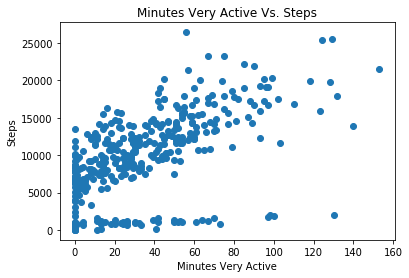

In [61]:
#fitbit.plot(x='Minutes Very Active', y='Steps', style='o')
plt.scatter(x=fitbit['Minutes Very Active'], y=fitbit['Steps'])
plt.title('Minutes Very Active Vs. Steps')
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')
plt.show()

#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [ ]:
"""
That the relationship between the minutes very active and the steps is directly proportional.
as one increases the other one increases as well.
They have positive correlation 0.5714518481062608
"""

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [63]:
fitbit = fitbit.astype({'Minutes Sedentary': float}, inplace = True)

In [64]:
fitbit['Minutes Sedentary'].corr(fitbit['Steps'])

0.07690608062990094

#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

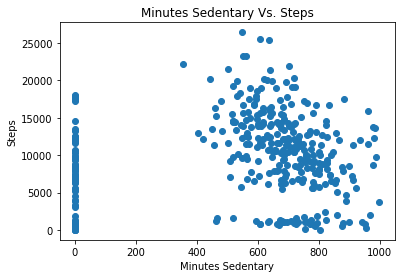

In [66]:
plt.scatter(x=fitbit['Minutes Sedentary'], y=fitbit['Steps'])
plt.title('Minutes Sedentary Vs. Steps')
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')
plt.show()

In [67]:
"""
The correlation between the two variables is very weak 0.07690608062990094
"""

'\nThe correlation between the two variables is very weak 0.07690608062990094\n'

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [68]:
fitbit['MinutesOfSleep'].corr(fitbit['Steps'])

0.13098565950836386

#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

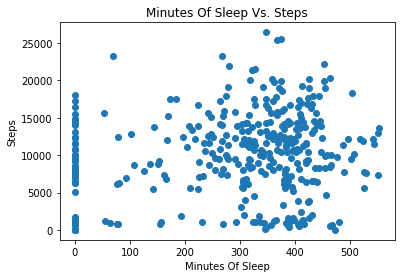

In [70]:
plt.scatter(x=fitbit['MinutesOfSleep'], y=fitbit['Steps'])
plt.title('Minutes Of Sleep Vs. Steps')
plt.xlabel('Minutes Of Sleep')
plt.ylabel('Steps')
plt.show()

In [ ]:
"""
The correlation between the two variables is very weak 0.13098565950836386
"""

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [71]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [72]:
cor_fit = fitbit[columns].corr()

In [73]:
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [75]:
cor_fit.sort_values(by='Steps', ascending=False)
# As we can see from the table below, there is a strong correlation between steps and
# Minutes Very Active = 0.571452
# Floors = 0.306511
# Calorie burned = 0.255305

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242


# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [76]:
driver = 'mysql+pymysql'
user = 'data-students'
password = 'iR0nH@cK-D4T4B4S3'
ip = '34.65.10.136'
database = 'time_grades'

conn_string = f'{driver}://{user}:{password}@{ip}/{database}'
conn = sqlalchemy.create_engine(conn_string)

In [78]:
time_grades = pd.read_sql_query('SELECT * FROM time_grades.time_grades;', conn)
time_grades

,Name,Study time,Grade
0,Jose,4,4\r
1,Maria,9,7\r
2,David,8,9\r
3,Sonia,10,7\r
4,Samuel,20,9\r
5,Eva,5,3\r
6,Carlos,12,7\r
7,Pedro,6,5\r
8,Ana,18,9\r
9,Gervasio,7,3\r


In [84]:
time_grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
Name          15 non-null object
Study time    15 non-null int64
Grade         15 non-null object
dtypes: int64(1), object(2)
memory usage: 440.0+ bytes


#### Show visually the frequency distribution of the `time_grades` dataset.

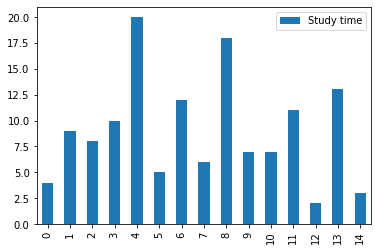

In [83]:
time_grades.plot(kind = 'bar')

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [88]:
time_grades['Grade'].replace(regex=True,inplace=True,to_replace=r'\r',value=r'')

In [91]:
time_grades = time_grades.astype({'Grade': int}, inplace = True)

In [95]:
time_grades['Grade'].corr(time_grades['Study time'], method = 'pearson')

0.7980456073578858

In [96]:
time_grades['Grade'].corr(time_grades['Study time'], method = 'spearman')

0.819658753036942

In [ ]:
"""
There is a small differance between the two methods used to calculate the correlation but from both of them we can clearly see
That there is a srtong correlation between the Study time and the Grade, they are directly proportional.
The more hours you spend studying the more likely you will get a higher grade.
"""

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

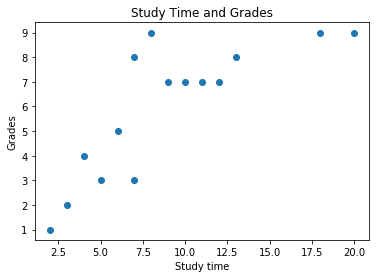

In [98]:
plt.scatter(x=time_grades['Study time'], y=time_grades['Grade'])
plt.title('Study Time and Grades')
plt.xlabel('Study time')
plt.ylabel('Grades')
plt.show()

In [ ]:
"""
That there is a srtong correlation between the Study time and the Grade, they are directly proportional.
The more hours you spend studying the more likely you will get a higher grade.
"""

#### Could you explain the difference between Pearson and Spearman correlations?

In [ ]:
"""
The Pearson correlation evaluates the linear relationship between two continuous variables.
A relationship is linear when a change in one variable is associated with a proportional change in the other variable.


The Spearman correlation evaluates the monotonic relationship between two continuous or ordinal variables. 
In a monotonic relationship, the variables tend to change together, but not necessarily at a constant rate.
The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data.
"""